In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange, tqdm
import torch
from torch import nn
from torchvision.datasets import CIFAR10 
from torchvision import transforms
from models.resnext import ResNeXt29_2x64d

In [3]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

testset = CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

Files already downloaded and verified


In [7]:
a = torch.randn(1, 3)
a

tensor([[-0.7028, -1.1852,  1.0164]])

In [8]:
a.max(1)

torch.return_types.max(
values=tensor([1.0164]),
indices=tensor([2]))

In [9]:
b = torch.randn(1, 3)
b.eq(a)

tensor([[False, False, False]])

In [2]:
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))

NVIDIA A100-SXM4-40GB


In [3]:
num_epochs = 3
batch_size = 128

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_data = CIFAR10(root = "./data/", transform = transform_train, train = True, download = True)
train_data_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data/


In [4]:
len(train_data_loader)

391

In [5]:
for x, y in train_data_loader:
    break
len(train_data_loader)

391

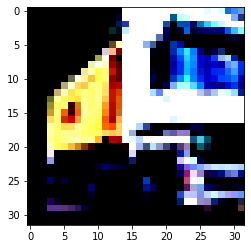

In [4]:
plt.imshow(np.clip(train_data[1][0].numpy().transpose((1, 2, 0)), 0, 1))
plt.show()

In [5]:
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.kaiming_uniform_(m.weight)

In [4]:
model = ResNeXt29_2x64d()
for param in model.parameters():
    print(param.dtype)

for param in model.parameters():
    param = param.to(torch.float16)

for param in model.parameters():
    print(param.dtype)

torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.

In [6]:
model = ResNeXt29_2x64d()
# model.fc = nn.Linear(in_features=model.fc.in_features, out_features=10)
model.apply(init_weights)
model = model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
loss = nn.CrossEntropyLoss()
training_loss = []
training_acc = []

for i in trange(num_epochs): 
    model.train()
    running_loss = 0
    correct = 0

    for x, y in train_data_loader:
        x = x.cuda()
        y = y.cuda()
        optimizer.zero_grad()
        y_hat = model(x)
        l = loss(y_hat, y)
        l.backward()
        optimizer.step()
        running_loss += l.item() * x.size(0)
        correct += sum(torch.argmax(y_hat) == y).item()
    
    training_loss.append(running_loss / 50000)
    training_acc.append(correct / 50000)

    if i % 10 == 9:
        torch.save(model.state_dict(), f"model_history/resnest_baseline_epoch{i+1}.pt")

 33%|███▎      | 1/3 [01:33<03:06, 93.42s/it]


KeyboardInterrupt: 

In [12]:
torch.save(model.state_dict(), "model_history/resnest_baseline.pt")

In [13]:
np.savez("model_history/resnest_baseline.npz", loss=training_loss, beta=training_acc)

In [5]:
for x, y in train_data_loader:
    break

y

tensor([0, 8, 1, 9, 1, 6, 9, 1, 6, 1, 1, 6, 1, 3, 5, 8, 9, 6, 7, 0, 8, 2, 6, 6,
        0, 4, 5, 6, 9, 1, 0, 4, 1, 7, 2, 8, 8, 4, 7, 4, 6, 7, 0, 0, 1, 7, 0, 5,
        2, 9, 8, 3, 3, 0, 9, 0, 5, 5, 2, 8, 9, 3, 8, 7, 5, 7, 6, 4, 2, 5, 5, 6,
        4, 5, 0, 9, 8, 7, 9, 1, 5, 9, 1, 2, 5, 8, 8, 9, 5, 9, 1, 5, 2, 4, 1, 3,
        1, 0, 4, 5, 2, 2, 8, 7, 2, 8, 4, 8, 1, 7, 1, 1, 0, 7, 8, 6, 4, 0, 0, 2,
        2, 1, 8, 6, 1, 4, 0, 0])